In [798]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction import DictVectorizer
%matplotlib inline

# Dataset

In [2]:
!wget https://raw.githubusercontent.com/ChaiyotMix/Test/main/Simulation%20Part/Bank%20Customer%20Churn%20Prediction.csv

--2022-10-09 15:56:01--  https://raw.githubusercontent.com/ChaiyotMix/Test/main/Simulation%20Part/Bank%20Customer%20Churn%20Prediction.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 561600 (548K) [text/plain]
Saving to: ‘Bank Customer Churn Prediction.csv’

Bank Customer Churn 100%[===================>] 548.44K  --.-KB/s    in 0.03s   

2022-10-09 15:56:01 (16.6 MB/s) - ‘Bank Customer Churn Prediction.csv’ saved [561600/561600]



In [1018]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [1019]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Features Engineering

In [1020]:
df = df.fillna(0)
df['tenure'] = df['tenure'].replace(0,1)

In [1021]:
df['avg_balance_per_year'] = df['balance']/df['tenure']

In [1022]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,avg_balance_per_year
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.00
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,83807.86
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,19957.60
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.00
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,62755.41


In [1023]:
len(df)

10000

In [1024]:
df_ref = df.copy()

In [1025]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           10000 non-null  int64  
 1   credit_score          10000 non-null  int64  
 2   country               10000 non-null  object 
 3   gender                10000 non-null  object 
 4   age                   10000 non-null  int64  
 5   tenure                10000 non-null  int64  
 6   balance               10000 non-null  float64
 7   products_number       10000 non-null  int64  
 8   credit_card           10000 non-null  int64  
 9   active_member         10000 non-null  int64  
 10  estimated_salary      10000 non-null  float64
 11  churn                 10000 non-null  int64  
 12  avg_balance_per_year  10000 non-null  float64
dtypes: float64(3), int64(8), object(2)
memory usage: 1015.8+ KB


In [1026]:
del df['customer_id']

In [1027]:
df['credit_score_bin'] = pd.cut(df['credit_score'],5)
df['age_bin'] = pd.cut(df['age'],5)

In [1028]:
df['credit_score_bin'] = df.credit_score_bin.astype(str)
df['age_bin'] = df.age_bin.astype(str)

In [1029]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,avg_balance_per_year,credit_score_bin,age_bin
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.00,"(550.0, 650.0]","(32.8, 47.6]"
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,83807.86,"(550.0, 650.0]","(32.8, 47.6]"
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,19957.60,"(450.0, 550.0]","(32.8, 47.6]"
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.00,"(650.0, 750.0]","(32.8, 47.6]"
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,62755.41,"(750.0, 850.0]","(32.8, 47.6]"


# Preparation

In [1030]:
X = df.drop(["churn"], axis = 1)
y = df.churn.values

In [1031]:
#Split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state=6)
print(np.size(y_train))
print(np.size(y_test))

8000
2000


In [1032]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient='records')
X_tran_train = dv.fit_transform(train_dict)

test_dict = X_test.to_dict(orient='records')
X_tran_test = dv.transform(test_dict)

In [1033]:
df_X_tran_train = pd.DataFrame(X_tran_train, columns = dv.get_feature_names_out())

In [1034]:
df_X_tran_train['target'] = y_train 

In [1035]:
df_X_tran_train.corr()

,active_member,age,"age_bin=(17.926, 32.8]","age_bin=(32.8, 47.6]","age_bin=(47.6, 62.4]","age_bin=(62.4, 77.2]","age_bin=(77.2, 92.0]",avg_balance_per_year,balance,country=France,...,"credit_score_bin=(450.0, 550.0]","credit_score_bin=(550.0, 650.0]","credit_score_bin=(650.0, 750.0]","credit_score_bin=(750.0, 850.0]",estimated_salary,gender=Female,gender=Male,products_number,tenure,target
active_member,1.000000,0.083860,0.013363,-0.082400,0.032558,0.119323,0.044015,0.018333,-0.014448,0.003308,...,-0.020009,0.004567,0.018252,-0.001854,-0.010341,-0.021326,0.021326,0.007689,-0.027791,-0.154936
age,0.083860,1.000000,-0.643061,-0.008748,0.547434,0.525330,0.203582,0.024255,0.036442,-0.033614,...,-0.004112,-0.000188,-0.005748,0.002478,-0.006203,0.031391,-0.031391,-0.041256,-0.007202,0.288580
"age_bin=(17.926, 32.8]",0.013363,-0.643061,1.000000,-0.686088,-0.247075,-0.117180,-0.031210,-0.019426,-0.032903,0.034848,...,0.008157,-0.005692,-0.003023,0.011627,0.005007,-0.013424,0.013424,0.027681,0.001942,-0.193151
"age_bin=(32.8, 47.6]",-0.082400,-0.008748,-0.686088,1.000000,-0.436166,-0.206861,-0.055095,-0.004176,-0.001009,-0.010536,...,-0.004819,-0.004464,0.015851,-0.010712,0.004078,-0.014140,0.014140,0.007972,0.001773,-0.051978
"age_bin=(47.6, 62.4]",0.032558,0.547434,-0.247075,-0.436166,1.000000,-0.074495,-0.019841,0.032584,0.048117,-0.032485,...,-0.005802,0.023488,-0.023695,-0.003648,-0.010543,0.033941,-0.033941,-0.039836,-0.001773,0.326636
"age_bin=(62.4, 77.2]",0.119323,0.525330,-0.117180,-0.206861,-0.074495,1.000000,-0.009410,0.000586,-0.003387,0.001205,...,0.005685,-0.014137,0.004331,0.007766,-0.008298,0.006768,-0.006768,-0.012023,-0.005794,0.009130
"age_bin=(77.2, 92.0]",0.044015,0.203582,-0.031210,-0.055095,-0.019841,-0.009410,1.000000,-0.009367,-0.011866,0.010150,...,-0.006181,-0.014044,0.015975,-0.000980,0.016824,0.004195,-0.004195,-0.011355,-0.001910,-0.019121
avg_balance_per_year,0.018333,0.024255,-0.019426,-0.004176,0.032584,0.000586,-0.009367,1.000000,0.581837,-0.136927,...,0.000027,-0.007319,-0.000815,0.007869,0.010386,0.007526,-0.007526,-0.189241,-0.534663,0.073680
balance,-0.014448,0.036442,-0.032903,-0.001009,0.048117,-0.003387,-0.011866,0.581837,1.000000,-0.239032,...,-0.003473,-0.004275,-0.001206,0.015080,0.009573,-0.014503,0.014503,-0.301414,-0.017705,0.117209
country=France,0.003308,-0.033614,0.034848,-0.010536,-0.032485,0.001205,0.010150,-0.136927,-0.239032,1.000000,...,0.014683,-0.015312,0.009357,-0.011522,0.000335,-0.014530,0.014530,-0.000281,-0.001272,-0.105651


In [1036]:
df[df.isin([np.inf, -np.inf])].sum()

credit_score            0.0
country                   0
gender                    0
age                     0.0
tenure                  0.0
balance                 0.0
products_number         0.0
credit_card             0.0
active_member           0.0
estimated_salary        0.0
churn                   0.0
avg_balance_per_year    0.0
credit_score_bin          0
age_bin                   0
dtype: object

In [1037]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tran_train = scaler.fit_transform(X_tran_train)

X_tran_test = scaler.transform(X_tran_test)

In [1038]:
df_corr = pd.DataFrame(X_tran_train, columns = dv.get_feature_names_out())

In [1039]:
df_corr['target'] = y_train

In [1040]:
df_corr.corr()

,active_member,age,"age_bin=(17.926, 32.8]","age_bin=(32.8, 47.6]","age_bin=(47.6, 62.4]","age_bin=(62.4, 77.2]","age_bin=(77.2, 92.0]",avg_balance_per_year,balance,country=France,...,"credit_score_bin=(450.0, 550.0]","credit_score_bin=(550.0, 650.0]","credit_score_bin=(650.0, 750.0]","credit_score_bin=(750.0, 850.0]",estimated_salary,gender=Female,gender=Male,products_number,tenure,target
active_member,1.000000,0.083860,0.013363,-0.082400,0.032558,0.119323,0.044015,0.018333,-0.014448,0.003308,...,-0.020009,0.004567,0.018252,-0.001854,-0.010341,-0.021326,0.021326,0.007689,-0.027791,-0.154936
age,0.083860,1.000000,-0.643061,-0.008748,0.547434,0.525330,0.203582,0.024255,0.036442,-0.033614,...,-0.004112,-0.000188,-0.005748,0.002478,-0.006203,0.031391,-0.031391,-0.041256,-0.007202,0.288580
"age_bin=(17.926, 32.8]",0.013363,-0.643061,1.000000,-0.686088,-0.247075,-0.117180,-0.031210,-0.019426,-0.032903,0.034848,...,0.008157,-0.005692,-0.003023,0.011627,0.005007,-0.013424,0.013424,0.027681,0.001942,-0.193151
"age_bin=(32.8, 47.6]",-0.082400,-0.008748,-0.686088,1.000000,-0.436166,-0.206861,-0.055095,-0.004176,-0.001009,-0.010536,...,-0.004819,-0.004464,0.015851,-0.010712,0.004078,-0.014140,0.014140,0.007972,0.001773,-0.051978
"age_bin=(47.6, 62.4]",0.032558,0.547434,-0.247075,-0.436166,1.000000,-0.074495,-0.019841,0.032584,0.048117,-0.032485,...,-0.005802,0.023488,-0.023695,-0.003648,-0.010543,0.033941,-0.033941,-0.039836,-0.001773,0.326636
"age_bin=(62.4, 77.2]",0.119323,0.525330,-0.117180,-0.206861,-0.074495,1.000000,-0.009410,0.000586,-0.003387,0.001205,...,0.005685,-0.014137,0.004331,0.007766,-0.008298,0.006768,-0.006768,-0.012023,-0.005794,0.009130
"age_bin=(77.2, 92.0]",0.044015,0.203582,-0.031210,-0.055095,-0.019841,-0.009410,1.000000,-0.009367,-0.011866,0.010150,...,-0.006181,-0.014044,0.015975,-0.000980,0.016824,0.004195,-0.004195,-0.011355,-0.001910,-0.019121
avg_balance_per_year,0.018333,0.024255,-0.019426,-0.004176,0.032584,0.000586,-0.009367,1.000000,0.581837,-0.136927,...,0.000027,-0.007319,-0.000815,0.007869,0.010386,0.007526,-0.007526,-0.189241,-0.534663,0.073680
balance,-0.014448,0.036442,-0.032903,-0.001009,0.048117,-0.003387,-0.011866,0.581837,1.000000,-0.239032,...,-0.003473,-0.004275,-0.001206,0.015080,0.009573,-0.014503,0.014503,-0.301414,-0.017705,0.117209
country=France,0.003308,-0.033614,0.034848,-0.010536,-0.032485,0.001205,0.010150,-0.136927,-0.239032,1.000000,...,0.014683,-0.015312,0.009357,-0.011522,0.000335,-0.014530,0.014530,-0.000281,-0.001272,-0.105651


## Plot data (select a few parameters)

In [1041]:
# Select Churn and Not-Churn data separately
C = df[df.churn == 1]
N = df[df.churn == 0]
print(np.size(df))
print(np.size(C))
print(np.size(N))

140000
28518
111482


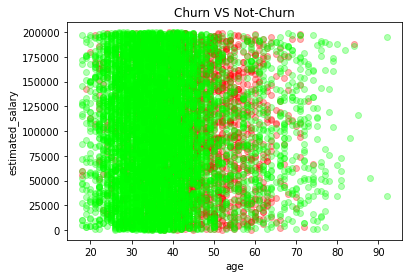

In [1042]:
#Plot Churn and Not-Churn data
plt.title("Churn VS Not-Churn")
plt.xlabel("age")
plt.ylabel("estimated_salary")
plt.scatter(C.age, C.estimated_salary, color = 'red', label = 'Churn', alpha = 0.3)
plt.scatter(N.age, N.estimated_salary, color = 'lime', label = 'Not-Churn', alpha = 0.3)

In [1043]:
#Set input x to all parameters, set y for the output
X = df.drop(["churn"], axis = 1)
y = df.churn.values
#print(np.size(x))
#print(np.size(y))
print (np.shape(X))
print (np.shape(y))

(10000, 13)
(10000,)


# Naive bayes

In [1044]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
# training the model
model.fit(X_tran_train, y_train)

GaussianNB()

In [1045]:
y_pred = model.predict(X_tran_test)

In [1046]:
print(accuracy_score(y_pred, y_test))

0.7775


In [1047]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1594
           1       0.46      0.56      0.51       406

    accuracy                           0.78      2000
   macro avg       0.67      0.70      0.68      2000
weighted avg       0.80      0.78      0.79      2000



## Confusion matrix

In [1048]:
#import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1326,  268],
       [ 177,  229]])

Text(0.5, 257.44, 'Predicted label')

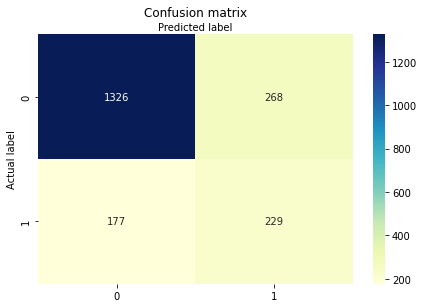

In [1049]:
import seaborn as sns
class_names = [0,1]  # name of classes
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmaps
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt= 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [1050]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6979544597659945

In [1051]:
y_test.shape

(2000,)

## ROC curve

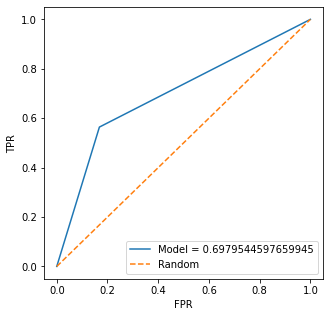

In [1052]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(5, 5))
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Model = "+str(auc))
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend(loc=4)

# Logistic Regression

In [1053]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=7)
logreg.fit(X_tran_train, y_train)
y_pred = logreg.predict(X_tran_test)

In [1054]:
print(accuracy_score(y_pred, y_test))

0.827


## Confusion matrix

In [1055]:
#import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1540,   54],
       [ 292,  114]])

In [1056]:
roc_auc_score(y_test,y_pred)

0.623455569222021

Text(0.5, 257.44, 'Predicted label')

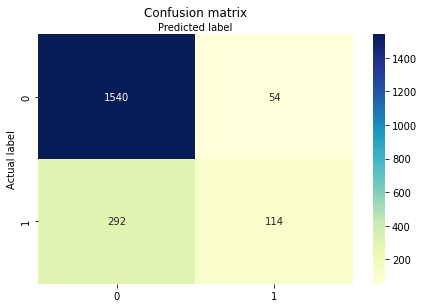

In [1057]:
import seaborn as sns
class_names = [0,1]  # name of classes
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmaps
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt= 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [1058]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1594
           1       0.68      0.28      0.40       406

    accuracy                           0.83      2000
   macro avg       0.76      0.62      0.65      2000
weighted avg       0.81      0.83      0.80      2000



## ROC curve

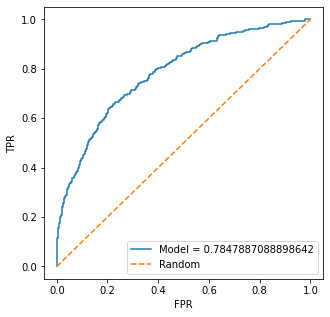

In [1059]:
y_pred_proba = logreg.predict_proba(X_tran_test)[::,1]
plt.figure(figsize=(5, 5))
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Model = "+str(auc))
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

# Decision Tree

## 1st Adjustment

In [1060]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [1061]:
model = DecisionTreeClassifier(criterion='gini', max_depth = 3)

In [1062]:
model.fit(X_tran_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [1063]:
y_pred = model.predict(X_tran_test)

In [1064]:
print(accuracy_score(y_test, y_pred))

0.835


In [1065]:
roc_auc_score(y_test, y_pred)

0.6220494341465224

In [1066]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1594
           1       0.78      0.26      0.39       406

    accuracy                           0.83      2000
   macro avg       0.81      0.62      0.65      2000
weighted avg       0.83      0.83      0.80      2000



### Plot Tree

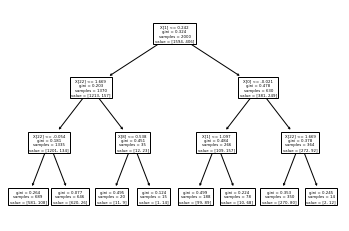

In [1067]:
tree.plot_tree(model.fit(X_tran_test,y_test))
plt.show()

### Confusion matrix

In [1068]:
#import the metrics class
#import Confusion metrics
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1563,   31],
       [ 299,  107]])

Text(0.5, 257.44, 'Predicted label')

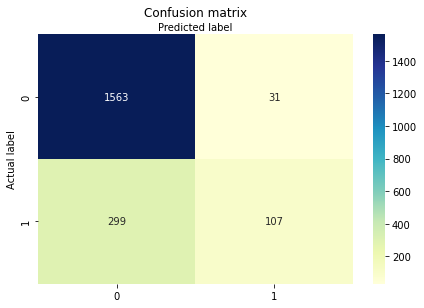

In [1069]:
import seaborn as sns
class_names = [0,1]  # name of classes
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmaps
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt= 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### ROC curve

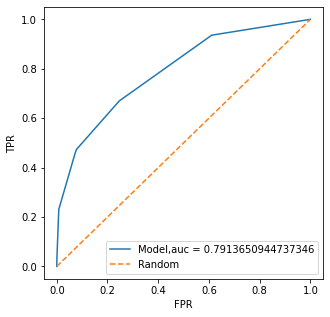

In [1070]:
y_pred_proba = model.predict_proba(X_tran_test)[::,1]
plt.figure(figsize=(5, 5))
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Model,auc = "+str(auc))
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

## 2nd Adjustment

In [1071]:
model = DecisionTreeClassifier(criterion='gini', max_depth = 5)

In [1072]:
model.fit(X_tran_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [1073]:
y_pred = model.predict(X_tran_test)

In [1074]:
print(accuracy_score(y_test, y_pred))

0.849


In [1075]:
roc_auc_score(y_test, y_pred)

0.6583678943822585

In [1076]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1594
           1       0.81      0.34      0.48       406

    accuracy                           0.85      2000
   macro avg       0.83      0.66      0.69      2000
weighted avg       0.84      0.85      0.82      2000



### Plot Tree

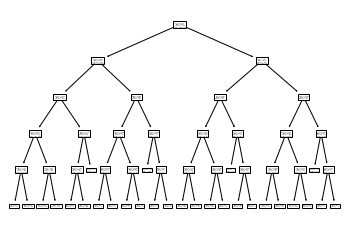

In [1077]:
tree.plot_tree(model.fit(X_tran_test,y_test))
plt.show()

### Confusion matrix

In [1078]:
#import Confusion metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1561,   33],
       [ 269,  137]])

Text(0.5, 257.44, 'Predicted label')

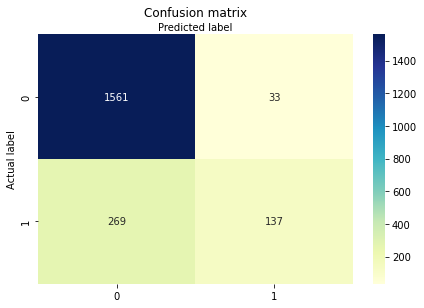

In [1079]:
class_names = [0,1]  # name of classes
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmaps
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt= 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### ROC curve

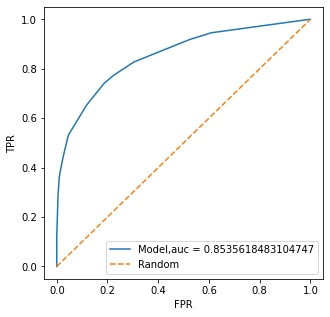

In [1080]:
y_pred_proba = model.predict_proba(X_tran_test)[::,1]
plt.figure(figsize=(5, 5))
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Model,auc = "+str(auc))
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

## Final Adjustment

In [1081]:
model = DecisionTreeClassifier(criterion='gini', max_depth = 17)

In [1082]:
model.fit(X_tran_train,y_train)

DecisionTreeClassifier(max_depth=17)

In [1083]:
y_pred = model.predict(X_tran_test)

In [1084]:
print(accuracy_score(y_test, y_pred))

0.814


In [1085]:
roc_auc_score(y_test, y_pred)

0.7080029173439808

In [1086]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1594
           1       0.54      0.53      0.54       406

    accuracy                           0.81      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.81      0.81      0.81      2000



### Plot Tree

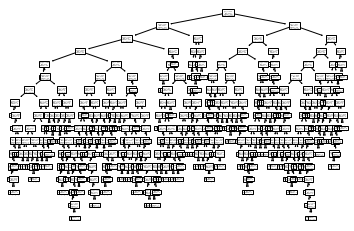

In [1087]:
tree.plot_tree(model.fit(X_tran_test,y_test))
plt.show()

### Confusion matrix

In [1088]:
#import Confusion metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1413,  181],
       [ 191,  215]])

Text(0.5, 257.44, 'Predicted label')

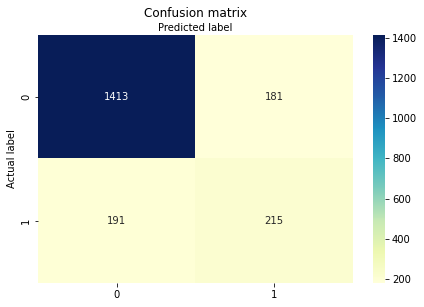

In [1089]:
class_names = [0,1]  # name of classes
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmaps
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt= 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### ROC curve

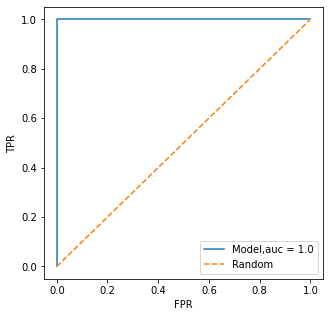

In [1090]:
y_pred_proba = model.predict_proba(X_tran_test)[::,1]
plt.figure(figsize=(5, 5))
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Model,auc = "+str(auc))
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

# Conclusion

These experiments consisted of 3 models.
1. Naive bayes
- precision (0) =  0.88
- precision (1) =  0.46
- recall (0) =  0.83
- recall (1) = 0.56
- f1-score (0) = 0.86
- f1-score (1) = 0.51
- accuracy = 0.78

2. Logistic Regression
- precision (0) =  0.84
- precision (1) =  0.68
- recall (0) =  0.97
- recall (1) = 0.28
- f1-score (0) = 0.90
- f1-score (1) = 0.40
- accuracy = 0.83

3. Decision Tree (Final Adjustment)
- precision (0) =  0.88
- precision (1) =  0.54
- recall (0) =  0.89
- recall (1) = 0.53
- f1-score (0) = 0.88
- f1-score (1) = 0.54
- accuracy = 0.81

The best model of 3 is the Decision Tree with max_depth = 17, because this model has high accuracy and has the highest AUC value, AUC = 1.